<a href="https://colab.research.google.com/github/linjimzen/AICAR_Project2/blob/main/Traffic_Sign_Classifier_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-[結報範本](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/aicar/project2

/content/drive/MyDrive/Colab Notebooks/aicar/project2


---
## Step 0: Load The Data

In [ ]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data
training_file = 'traffic-signs-data/train.p'
validation_file='traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results.

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [ ]:
### Replace each question mark with the appropriate value.
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np
import random
import pandas as pd

# TODO: Number of training examples
n_train = len(X_train)

n_valid= len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = [X_train.shape[1],X_train.shape[2],X_train.shape[3]]

# TODO: How many unique classes/labels there are in the dataset.
def getLabelsCount(labels):
    d = dict(zip(labels, [0] * len(labels)))
    for x in labels:
        d[x] += 1
    return d
signsDicts = getLabelsCount(y_train)
n_classes = len(signsDicts)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = [32, 32, 3]
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

0. Speed limit (20km/h) - Samples: 180


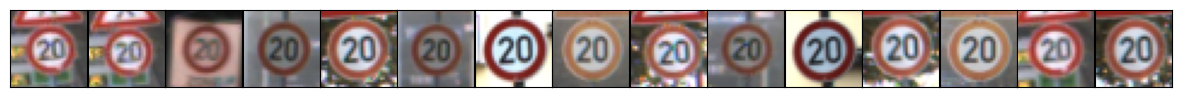

----------------------------------------------------------------------------

1. Speed limit (30km/h) - Samples: 1980


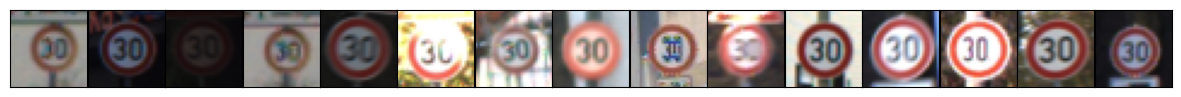

----------------------------------------------------------------------------

2. Speed limit (50km/h) - Samples: 2010


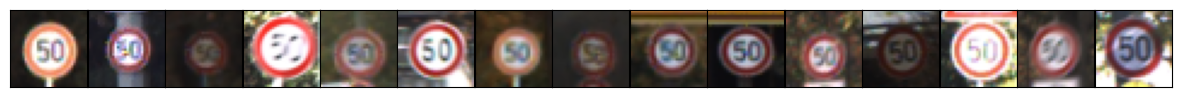

----------------------------------------------------------------------------

3. Speed limit (60km/h) - Samples: 1260


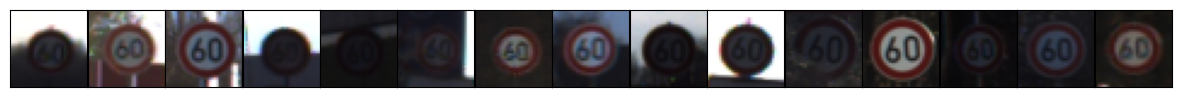

----------------------------------------------------------------------------

4. Speed limit (70km/h) - Samples: 1770


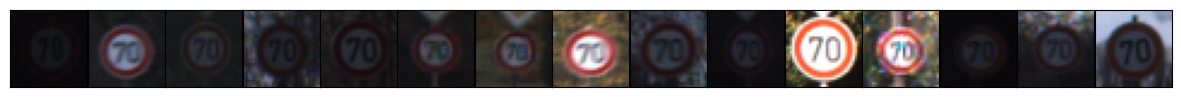

----------------------------------------------------------------------------

5. Speed limit (80km/h) - Samples: 1650


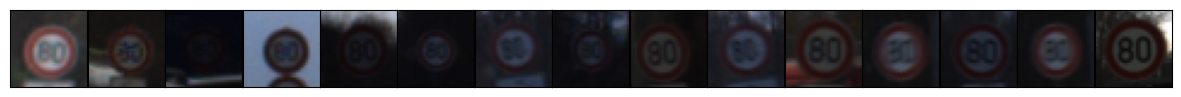

----------------------------------------------------------------------------

6. End of speed limit (80km/h) - Samples: 360


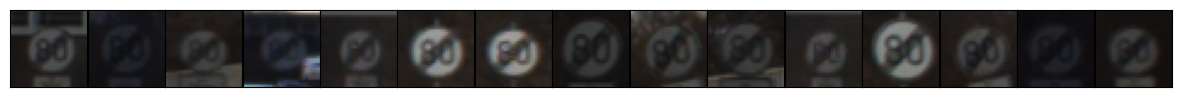

----------------------------------------------------------------------------

7. Speed limit (100km/h) - Samples: 1290


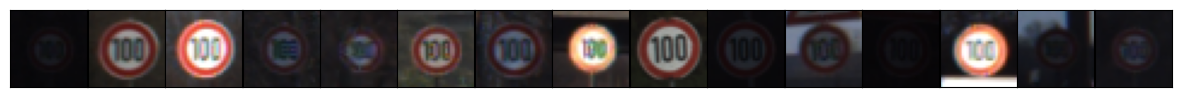

----------------------------------------------------------------------------

8. Speed limit (120km/h) - Samples: 1260


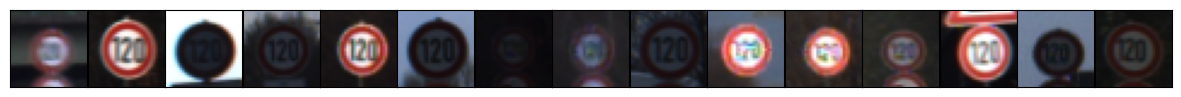

----------------------------------------------------------------------------

9. No passing - Samples: 1320


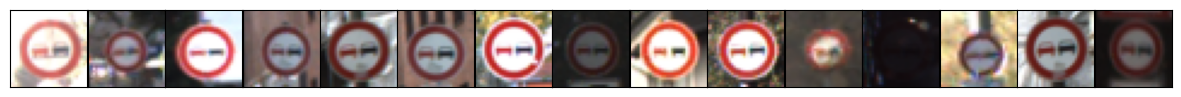

----------------------------------------------------------------------------

10. No passing for vehicles over 3.5 metric tons - Samples: 1800


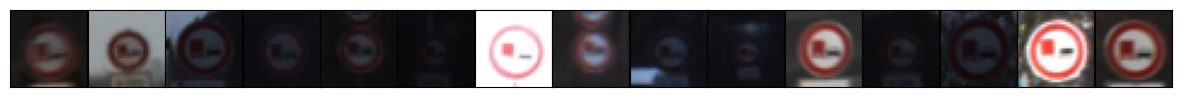

----------------------------------------------------------------------------

11. Right-of-way at the next intersection - Samples: 1170


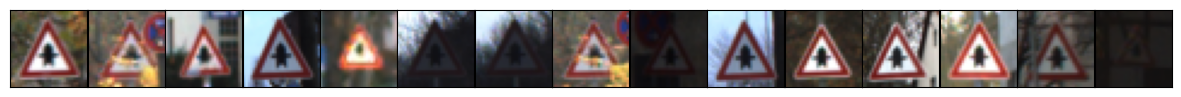

----------------------------------------------------------------------------

12. Priority road - Samples: 1890


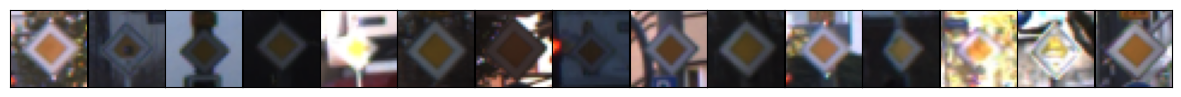

----------------------------------------------------------------------------

13. Yield - Samples: 1920


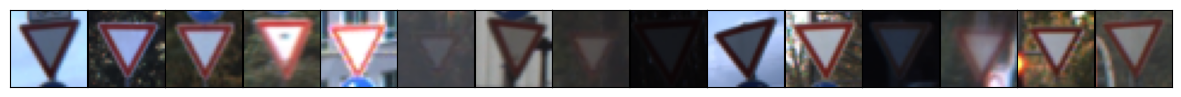

----------------------------------------------------------------------------

14. Stop - Samples: 690


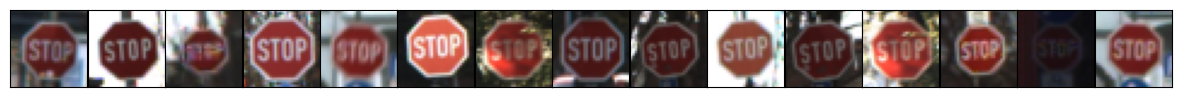

----------------------------------------------------------------------------

15. No vehicles - Samples: 540


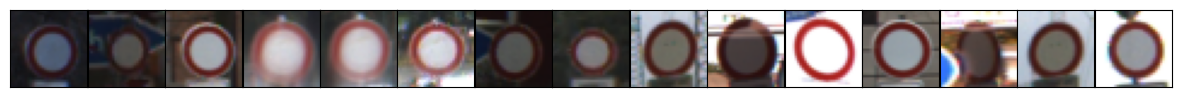

----------------------------------------------------------------------------

16. Vehicles over 3.5 metric tons prohibited - Samples: 360


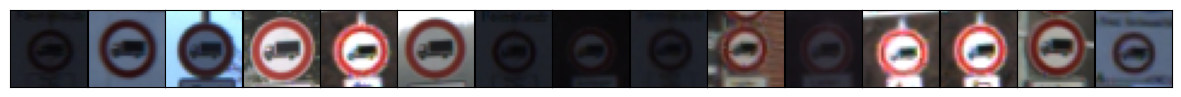

----------------------------------------------------------------------------

17. No entry - Samples: 990


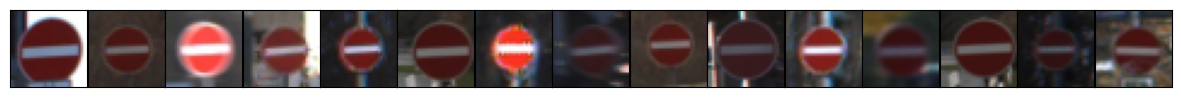

----------------------------------------------------------------------------

18. General caution - Samples: 1080


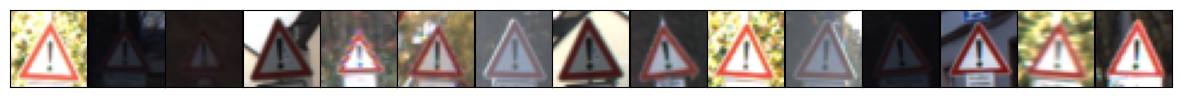

----------------------------------------------------------------------------

19. Dangerous curve to the left - Samples: 180


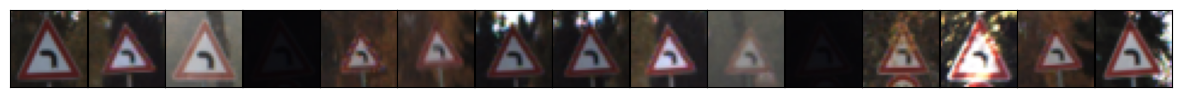

----------------------------------------------------------------------------

20. Dangerous curve to the right - Samples: 300


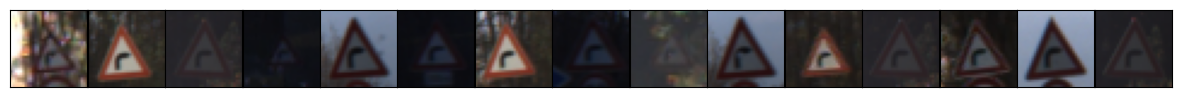

----------------------------------------------------------------------------

21. Double curve - Samples: 270


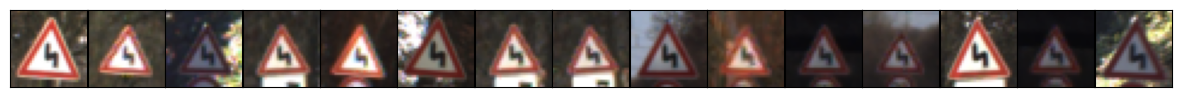

----------------------------------------------------------------------------

22. Bumpy road - Samples: 330


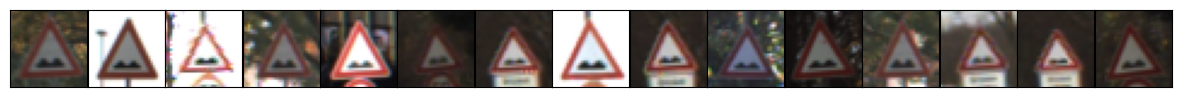

----------------------------------------------------------------------------

23. Slippery road - Samples: 450


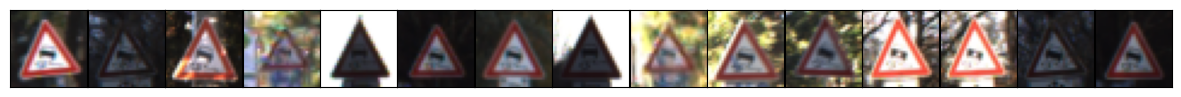

----------------------------------------------------------------------------

24. Road narrows on the right - Samples: 240


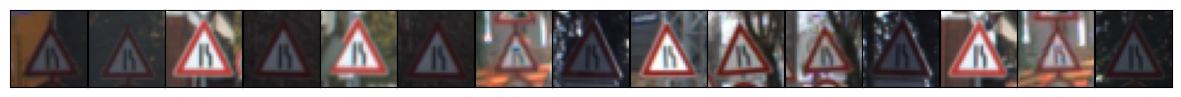

----------------------------------------------------------------------------

25. Road work - Samples: 1350


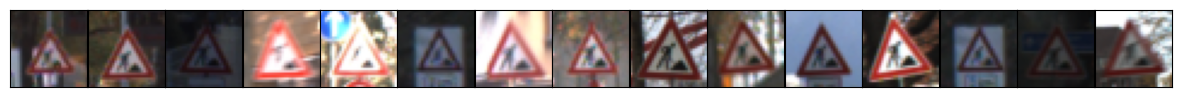

----------------------------------------------------------------------------

26. Traffic signals - Samples: 540


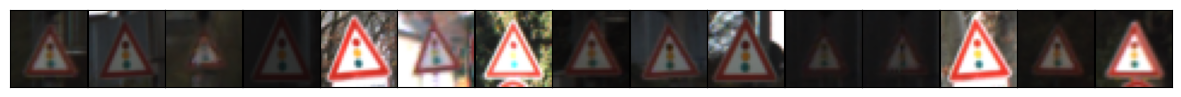

----------------------------------------------------------------------------

27. Pedestrians - Samples: 210


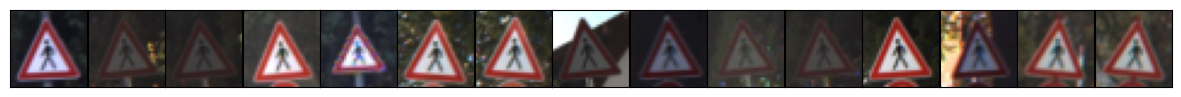

----------------------------------------------------------------------------

28. Children crossing - Samples: 480


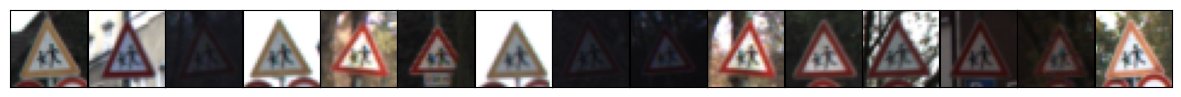

----------------------------------------------------------------------------

29. Bicycles crossing - Samples: 240


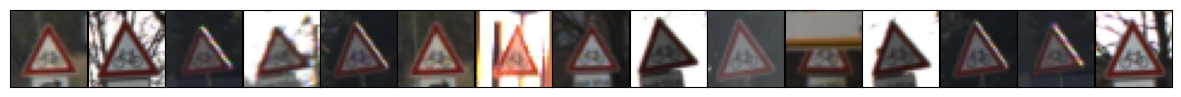

----------------------------------------------------------------------------

30. Beware of ice/snow - Samples: 390


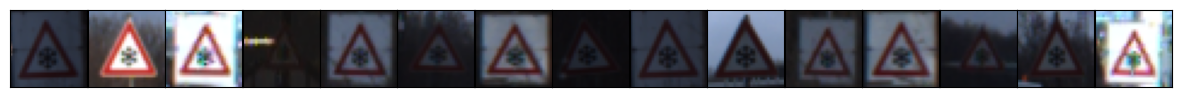

----------------------------------------------------------------------------

31. Wild animals crossing - Samples: 690


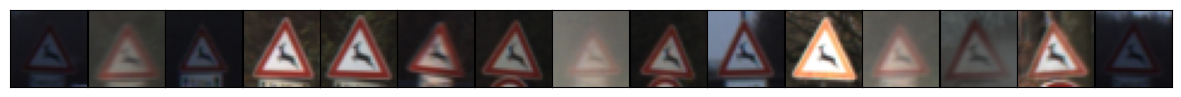

----------------------------------------------------------------------------

32. End of all speed and passing limits - Samples: 210


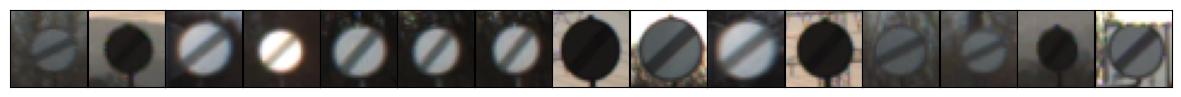

----------------------------------------------------------------------------

33. Turn right ahead - Samples: 599


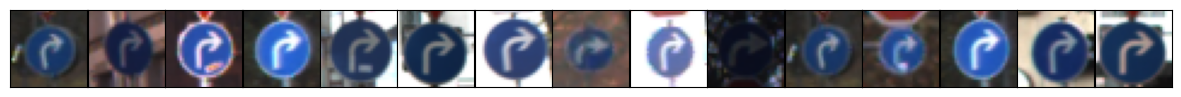

----------------------------------------------------------------------------

34. Turn left ahead - Samples: 360


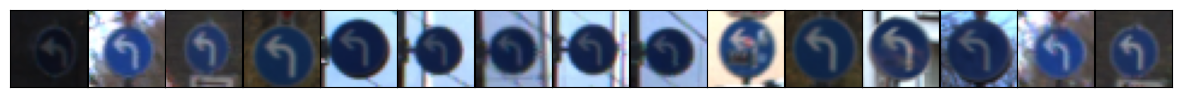

----------------------------------------------------------------------------

35. Ahead only - Samples: 1080


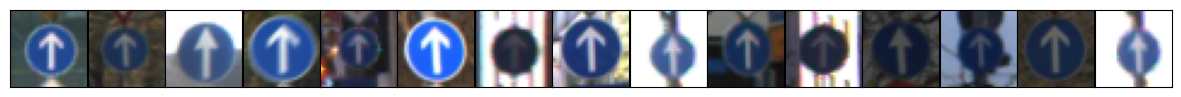

----------------------------------------------------------------------------

36. Go straight or right - Samples: 330


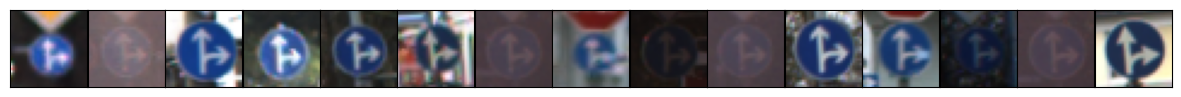

----------------------------------------------------------------------------

37. Go straight or left - Samples: 180


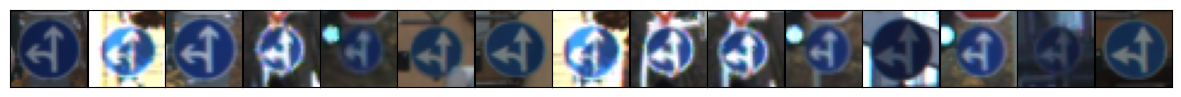

----------------------------------------------------------------------------

38. Keep right - Samples: 1860


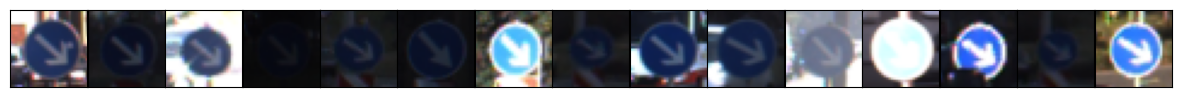

----------------------------------------------------------------------------

39. Keep left - Samples: 270


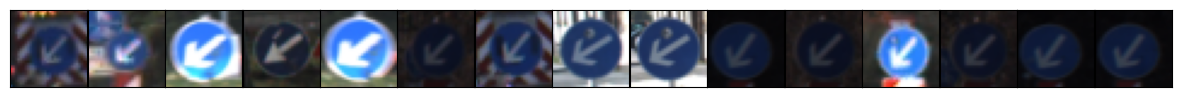

----------------------------------------------------------------------------

40. Roundabout mandatory - Samples: 300


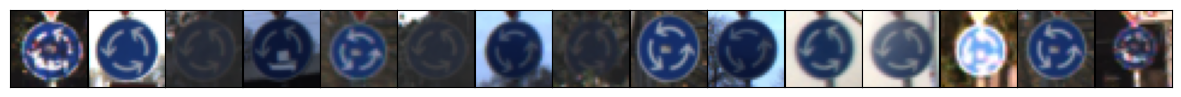

----------------------------------------------------------------------------

41. End of no passing - Samples: 210


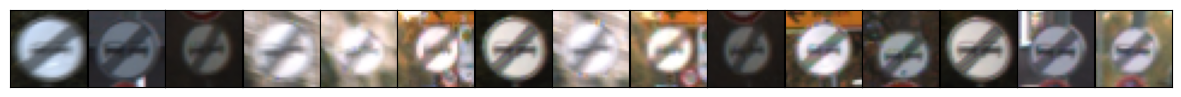

----------------------------------------------------------------------------

42. End of no passing by vehicles over 3.5 metric tons - Samples: 210


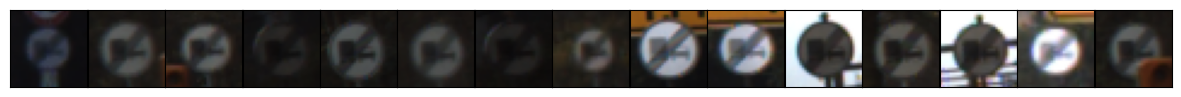

----------------------------------------------------------------------------



In [ ]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
# Visualizations will be shown in the notebook.
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2

def getSignNames():
    return pd.read_csv('./signnames.csv').values

def plotImages(X, y, examples_per_sign=15, squeeze=False, cmap=None):
    samples_per_sign = np.bincount(y) #將 y 中的每個類別的出現次數計算出來，並以一個陣列的形式返回
    for sign in getSignNames():
        print("{0}. {1} - Samples: {2}".format(sign[0], sign[1], samples_per_sign[sign[0]]))
        sample_indices = np.where(y==sign[0])[0]
        random_samples = random.sample(list(sample_indices), examples_per_sign)
        fig = plt.figure(figsize = (examples_per_sign, 1))
        fig.subplots_adjust(hspace = 0, wspace = 0)
        for i in range(examples_per_sign):
            image = X[random_samples[i]]
            axis = fig.add_subplot(1,examples_per_sign, i+1, xticks=[], yticks=[])
            if squeeze: image = image.squeeze()
            if cmap == None: axis.imshow(image)
            else: axis.imshow(image.squeeze(), cmap=cmap)
        plt.show()
        print("----------------------------------------------------------------------------\n")

plotImages(X_train, y_train)


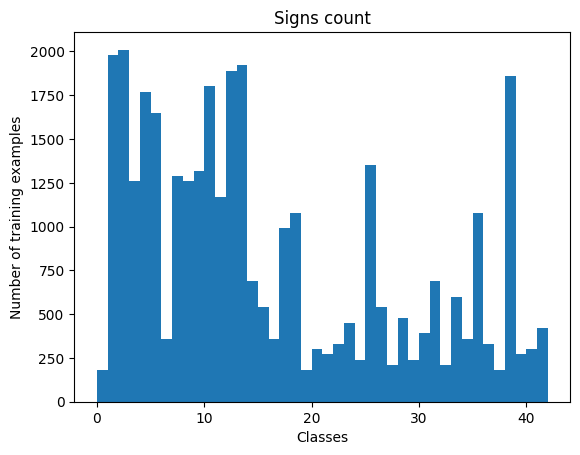

In [ ]:
# plot the histogram
samples_per_sign = np.bincount(y_train)
bins = range(len(samples_per_sign))
plt.hist(y_train, bins=bins)
plt.title('Signs count')
plt.xlabel('Classes')
plt.ylabel('Number of training examples')
plt.show()

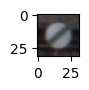

[32 'End of all speed and passing limits']


In [ ]:
index = random.randint(3, len(X_train))
X_train_cnt=len(X_train)
image = X_train[index].squeeze()
plt.figure(figsize=(1,1))
plt.imshow(image)
plt.tight_layout()
plt.show()

signNames= getSignNames()
print(signNames[y_train[index]])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission.

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [ ]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from tensorflow import keras

from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)
print ("TensorFlow version: " + tf.__version__)

TensorFlow version: 2.15.0


In [ ]:
'''
grayconversion_train = tf.image.rgb_to_grayscale(X_train)
with tf.Session() as sess:
    grayscale_train = sess.run(grayconversion_train)
grayconversion_valid = tf.image.rgb_to_grayscale(X_valid)
with tf.Session() as sess:
    grayscale_valid = sess.run(grayconversion_valid)
grayconversion_test = tf.image.rgb_to_grayscale(X_test)
with tf.Session() as sess:
    grayscale_test = sess.run(grayconversion_test)

X_train_all = np.append(X_train,grayscale_train,axis=3)
X_test_all = np.append(X_test,grayscale_test,axis=3)
X_valid_all = np.append(X_valid,grayscale_valid,axis=3)
print(X_train_all.shape)
print(X_valid_all.shape)
print(X_test_all.shape)
'''

'\ngrayconversion_train = tf.image.rgb_to_grayscale(X_train)\nwith tf.Session() as sess:\n    grayscale_train = sess.run(grayconversion_train)\ngrayconversion_valid = tf.image.rgb_to_grayscale(X_valid)\nwith tf.Session() as sess:\n    grayscale_valid = sess.run(grayconversion_valid)\ngrayconversion_test = tf.image.rgb_to_grayscale(X_test)\nwith tf.Session() as sess:\n    grayscale_test = sess.run(grayconversion_test)\n\nX_train_all = np.append(X_train,grayscale_train,axis=3)\nX_test_all = np.append(X_test,grayscale_test,axis=3)\nX_valid_all = np.append(X_valid,grayscale_valid,axis=3)\nprint(X_train_all.shape)\nprint(X_valid_all.shape)\nprint(X_test_all.shape)\n'

processed the data
(34799, 32, 32, 1)
(4410, 32, 32, 1)
(12630, 32, 32, 1)


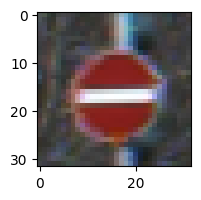

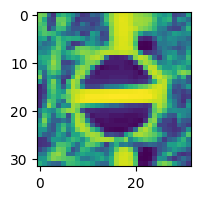

In [ ]:
# rgb to gray
def grayAndEqualizeHist(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    equ = cv2.equalizeHist(gray)
    return equ

x_train = np.array([grayAndEqualizeHist(img) for img in X_train])
x_valid = np.array([grayAndEqualizeHist(img) for img in X_valid ])
x_test = np.array([grayAndEqualizeHist(img) for img in X_test])

x_train = np.expand_dims(x_train, axis=-1)
x_valid = np.expand_dims(x_valid, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# one-hot matrix
y_train_onehot   = keras.utils.to_categorical(y_train, n_classes)
y_valid_onehot   = keras.utils.to_categorical(y_valid, n_classes)
y_test_onehot   = keras.utils.to_categorical(y_test, n_classes)

print("processed the data")

print(x_train.shape)
print(x_valid.shape)
print(x_test.shape)


plt.figure(figsize=(2,2))
image= X_train[120]
plt.imshow(image)
plt.show()

plt.figure(figsize=(2,2))
image2=x_train[120]
plt.imshow(image2)
plt.show()


### Model Architecture

- [參考](https://github.com/v-thiennp12/Traffic-Sign-Recognition-with-Keras-Tensorflow/blob/main/traffic_sign_classifier_LeNet.ipynb)

In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
# LeNet Model
from keras.models import Sequential
from keras.layers import Conv2D,AveragePooling2D,Flatten, Dense
def LeNet():
    model = Sequential(name="LeNet_Model")
    input_shape = x_train[0].shape # (32,32,1)
    # Layer1
    model.add(Conv2D(32, kernel_size=(5,5), strides=1, activation='relu', padding='valid', input_shape=input_shape))
    model.add(AveragePooling2D(pool_size=(2,2), strides=2, padding='valid'))

    # Layer2
    model.add(Conv2D(64, kernel_size=(5,5), strides=1, activation='relu', padding='valid'))
    model.add(AveragePooling2D(pool_size=(2,2), strides=2, padding='valid'))

    # Layer3
    model.add(Flatten())
    model.add(Dense(units=1024, activation='relu', kernel_initializer="he_normal"))
    model.add(Dense(units=128, activation='relu', kernel_initializer="he_normal"))
    model.add(Dense(units=43,activation='softmax'))

    return model

LeNet_model = LeNet()

LeNet_model.summary()

Model: "LeNet_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 average_pooling2d (Average  (None, 14, 14, 32)        0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        51264     
                                                                 
 average_pooling2d_1 (Avera  (None, 5, 5, 64)          0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 1024)              

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
            featurewise_center=False,
            featurewise_std_normalization=False,
            rotation_range=10,
            zoom_range=0.2,
            width_shift_range=0.1,
            height_shift_range=0.1,
            shear_range = 0.11,
            horizontal_flip=False,
            vertical_flip = False)

datagen.fit(X_train)

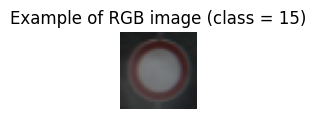

In [ ]:
# take a random image from the training set
img_rgb = X_train[650]

# plot the original image
import matplotlib.pyplot as plot
fig = plot.figure(figsize=(1,1))
plot.imshow(img_rgb)
plot.title('Example of RGB image (class = {})'.format(y_train[650]))
plot.axis('off')
plot.show()

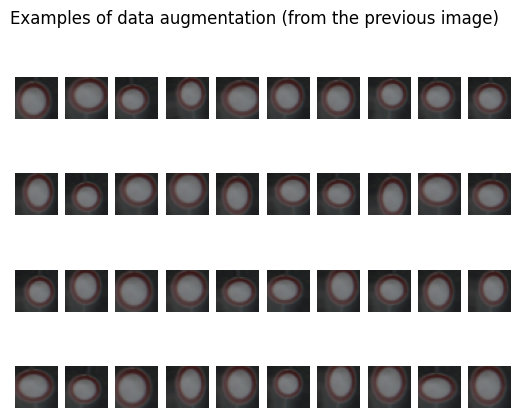

In [ ]:
# plot some augmented images
import numpy as np
import matplotlib.pyplot as plt

# Assuming datagen is an ImageDataGenerator and img_rgb, y_train are defined
rows, cols = 4, 10
fig, ax_array = plt.subplots(rows, cols)
for ax in ax_array.ravel():
    augmented_batch = next(datagen.flow(np.expand_dims(img_rgb, 0), y_train[6500:6501]))
    augmented_img = augmented_batch[0]
    ax.imshow(np.uint8(np.squeeze(augmented_img)))
    ax.axis('off')

plt.suptitle('Examples of data augmentation (from the previous image)')
plt.show()


#fig.savefig('figures/' + 'data_augmentation_ex' + '.jpg', dpi=700)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [ ]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected,
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

rate = 0.001

LeNet_model.compile(
    optimizer=keras.optimizers.Nadam(learning_rate = rate),
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"])


EPOCHS        = 30
BATCH_SIZE      = 128
STEPS_PER_EPOCH = int(len(x_train)/BATCH_SIZE)

history           = LeNet_model.fit(
                datagen.flow(x_train, y_train_onehot, batch_size=BATCH_SIZE,shuffle=True),
                validation_data=(x_valid, y_valid_onehot),
                shuffle=True,
                steps_per_epoch=STEPS_PER_EPOCH,
                epochs=EPOCHS)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


271/271 [==============================] - 20s 55ms/step - loss: 2.6220 - accuracy: 0.4399 - val_loss: 0.7369 - val_accuracy: 0.7764
Epoch 2/30
271/271 [==============================] - 15s 56ms/step - loss: 0.7341 - accuracy: 0.7742 - val_loss: 0.4074 - val_accuracy: 0.8587
Epoch 3/30
271/271 [==============================] - 15s 54ms/step - loss: 0.4352 - accuracy: 0.8653 - val_loss: 0.2195 - val_accuracy: 0.9295
Epoch 4/30
271/271 [==============================] - 15s 54ms/step - loss: 0.3001 - accuracy: 0.9079 - val_loss: 0.1674 - val_accuracy: 0.9444
Epoch 5/30
271/271 [==============================] - 15s 54ms/step - loss: 0.2422 - accuracy: 0.9235 - val_loss: 0.1939 - val_accuracy: 0.9363
Epoch 6/30
271/271 [==============================] - 16s 61ms/step - loss: 0.1970 - accuracy: 0.9384 - val_loss: 0.1300 - val_accuracy: 0.9601
Epoch 7/30
271/271 [==============================] - 15s 54ms/step - loss: 0.1725 - accuracy: 0.9462 - val_loss: 0.1524 - val_accuracy: 0.9528
Epo

In [ ]:
LeNet_model.save("LeNet.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# test model

#Load saved model
LeNet_model = keras.models.load_model("LeNet.h5")

predictions = LeNet_model.predict(x_test)

predicted_labels = np.argmax(predictions, axis=1)

accuracy = np.mean(predicted_labels == y_test)

print("Test Accuracy:", accuracy)

395/395 [==============================] - 1s 2ms/step
Test Accuracy: 0.9463182897862232



Plot of training error over 30 epochs:


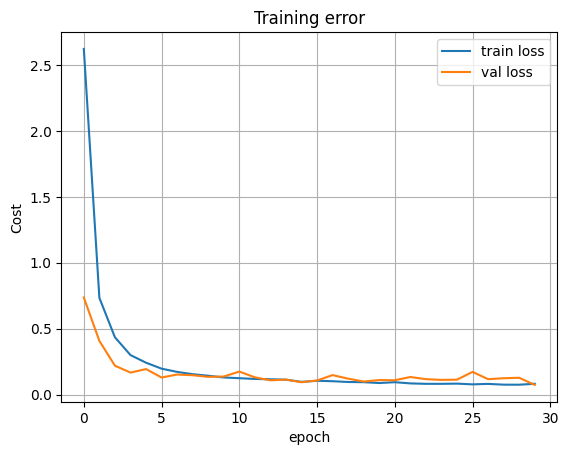

In [ ]:
import matplotlib.pyplot as plt



# Plot training error.
print('\nPlot of training error over 30 epochs:')
fig = plt.figure()
plt.title('Training error')
plt.ylabel('Cost')
plt.xlabel('epoch')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train loss', 'val loss'], loc='upper right')
plt.grid()
plt.show()


Plot of training accuracy over 30 epochs:


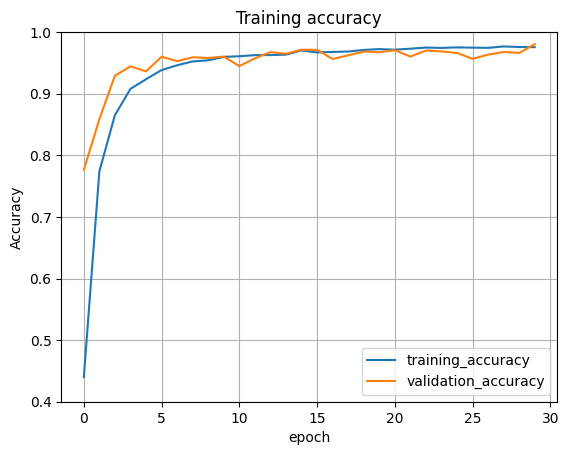

In [ ]:
# Plot training error.
print('\nPlot of training accuracy over 30 epochs:')
fig = plt.figure()
plt.title('Training accuracy')
plt.ylabel('Accuracy')
plt.ylim([0.4, 1])
plt.xlabel('epoch')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training_accuracy', 'validation_accuracy'], loc='lower right')
plt.grid()
plt.show()


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
'''
import matplotlib.image as mpimg
NImages = 15
X_real = np.zeros((NImages,32,32,3)).astype(np.uint8)
y_real = np.array([17,12,14,11,38,4,35,33,25,13,16,5,38,9,34])
for i in range(NImages):
    image = mpimg.imread('./testImages/'+str(i+1)+'.png')
    image = np.multiply(image,256).astype(np.uint8)[:,:,0:3]
    X_real[i] = image
    print(signNames[y_real[i]])
    print(X_real[i].shape)
    plt.figure(figsize=(1,1))
    plt.imshow(X_real[i])
    plt.show()
'''

[16 'Vehicles over 3.5 metric tons prohibited']
(32, 32, 3)


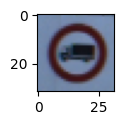

[5 'Speed limit (80km/h)']
(32, 32, 3)


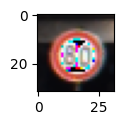

[38 'Keep right']
(32, 32, 3)


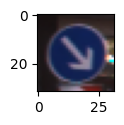

[9 'No passing']
(32, 32, 3)


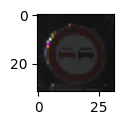

[34 'Turn left ahead']
(32, 32, 3)


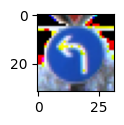

In [ ]:
import matplotlib.image as mpimg
NImages = 5
X_real = np.zeros((NImages,32,32,3)).astype(np.uint8)
y_real = np.array([16,5,38,9,34])
for i in range(NImages):
    image = mpimg.imread('./testImages/'+str(i+11)+'.png')
    image = cv2.resize(image, (32, 32))
    image = np.multiply(image,256).astype(np.uint8)[:,:,0:3]
    X_real[i] = image
    print(signNames[y_real[i]])
    print(X_real[i].shape)
    plt.figure(figsize=(1,1))
    plt.imshow(X_real[i])
    plt.show()


### Predict the Sign Type for Each Image

1/1 [==============================] - 0s 130ms/step
預測為[16 'Vehicles over 3.5 metric tons prohibited'], 真實結果為[16 'Vehicles over 3.5 metric tons prohibited']


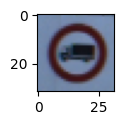

預測為[5 'Speed limit (80km/h)'], 真實結果為[5 'Speed limit (80km/h)']


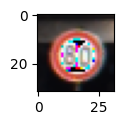

預測為[38 'Keep right'], 真實結果為[38 'Keep right']


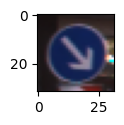

預測為[9 'No passing'], 真實結果為[9 'No passing']


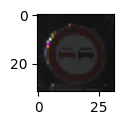

預測為[34 'Turn left ahead'], 真實結果為[34 'Turn left ahead']


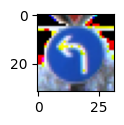

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

x_real = np.array([grayAndEqualizeHist(img) for img in X_real])
x_real = np.expand_dims(x_real, axis=-1)

predictions = LeNet_model.predict(x_real)

predicted_labels = np.argmax(predictions, axis=1)

#print("預測label：",predicted_labels)
#print("正確label：",y_real)



for i in range(len(y_real)):
    print(f"預測為{signNames[predicted_labels[i]]}, 真實結果為{signNames[y_real[i]]}")
    plt.figure(figsize=(1,1))
    plt.imshow(X_real[i])
    plt.show()


### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images.
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.


x_real = np.array([grayAndEqualizeHist(img) for img in X_real])
x_real = np.expand_dims(x_real, axis=-1)

predictions = LeNet_model.predict(x_real)

predicted_labels = np.argmax(predictions, axis=1)

accuracy = np.mean(predicted_labels == y_real)

print("Test Accuracy:", accuracy)

1/1 [==============================] - 0s 21ms/step
Test Accuracy: 1.0


In [ ]:
top5_indices = np.argsort(predictions, axis=1)[:, -5:][:, ::-1]

for i in range(len(y_real)):
    print("true label:", signNames[y_real[i]])
    print("Predict top5:")
    for j, idx in enumerate(top5_indices[i]):
        print(f"{j+1}. label: {signNames[idx]}, prediction: {predictions[i][idx]}")

true label: [16 'Vehicles over 3.5 metric tons prohibited']
Predict top5:
1. label: [16 'Vehicles over 3.5 metric tons prohibited'], prediction: 1.0
2. label: [9 'No passing'], prediction: 1.0446475265042124e-20
3. label: [8 'Speed limit (120km/h)'], prediction: 1.4728176988705403e-21
4. label: [15 'No vehicles'], prediction: 2.1277037690940985e-22
5. label: [17 'No entry'], prediction: 1.264899570679265e-23
true label: [5 'Speed limit (80km/h)']
Predict top5:
1. label: [5 'Speed limit (80km/h)'], prediction: 0.8075127601623535
2. label: [7 'Speed limit (100km/h)'], prediction: 0.1121322438120842
3. label: [3 'Speed limit (60km/h)'], prediction: 0.043852049857378006
4. label: [8 'Speed limit (120km/h)'], prediction: 0.026787029579281807
5. label: [2 'Speed limit (50km/h)'], prediction: 0.005588818807154894
true label: [38 'Keep right']
Predict top5:
1. label: [38 'Keep right'], prediction: 1.0
2. label: [12 'Priority road'], prediction: 4.1528162343138045e-29
3. label: [36 'Go straight

395/395 [==============================] - 1s 2ms/step


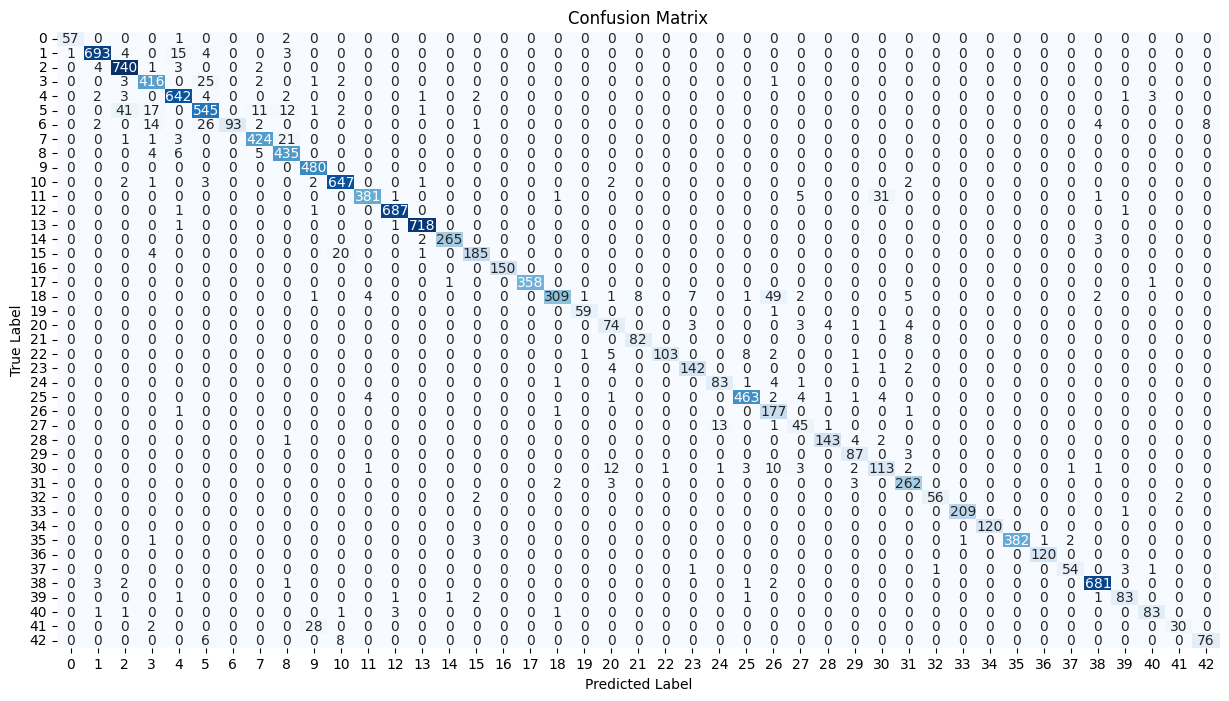

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

predictions = LeNet_model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
conf_matrix = confusion_matrix(y_test, predicted_labels)


plt.figure(figsize=(15, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()